Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#statistical test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\FELICITA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\winequality-red.csv")

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.shape

(1599, 12)

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Exploratory Data Analysis

Target Variable

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

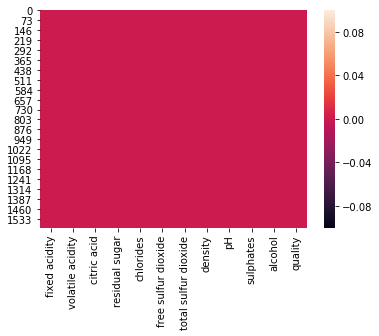

In [10]:
sns.heatmap(data.isnull())

In [11]:
data.quality.dtype

dtype('int64')

In [12]:
data.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

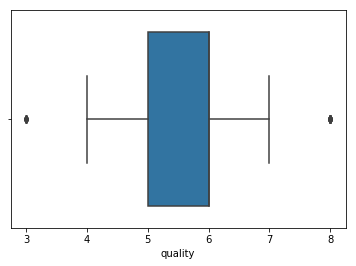

In [13]:
sns.boxplot(data.quality)

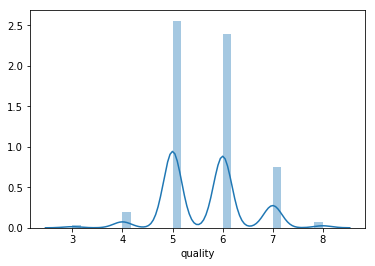

In [14]:
sns.distplot(data.quality)

In [15]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Fixed Acidity

Data Type
 float64
Unique Datas
 [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
Describing the data
 count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64


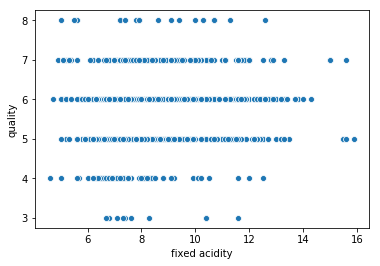

correlation
 [[1.         0.12405165]
 [0.12405165 1.        ]]


In [16]:
print("Data Type\n",data["fixed acidity"].dtype)
print("Unique Datas\n",data["fixed acidity"].unique())
print("Describing the data\n",data["fixed acidity"].describe())

sns.scatterplot(x="fixed acidity",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["fixed acidity"],data.quality))

In [17]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Volatile Acidity

Data Type
 float64
Unique Datas
 [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27  0.2   0.36  0.83  0.46  0.47  0.77  0.815 0.795 0.665 0.765 0.24
 0.85  0.84  0.96  0.78  0.23  0.315 0.365 0.25  0.825 0.72  0.595 0.585
 0.915 0.755 0.845 1.24  0.8   0.98  1.185 0.92  1.035 1.025 0.565 0.74
 1.115 0.865 0.875 0.965 0.91  0.89  1.01  0.305 0.395 0.12  0.86  0.295
 1.005 0.19  0.955 0.16  1.58  0.79  1.18  0.475 0.81  0.895 0.855]
Describing the data
 count    1599.000000
mean        0.527821
std         0.179060
min         0.12000

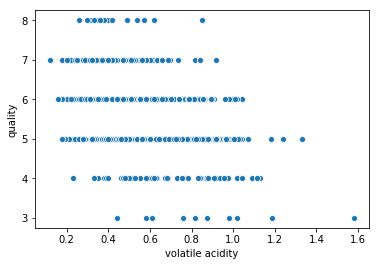

correlation
 [[ 1.         -0.39055778]
 [-0.39055778  1.        ]]


In [18]:
print("Data Type\n",data["volatile acidity"].dtype)
print("Unique Datas\n",data["volatile acidity"].unique())
print("Describing the data\n",data["volatile acidity"].describe())

sns.scatterplot(x="volatile acidity",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["volatile acidity"],data.quality))

In [19]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Citric Acid

Data Type
 float64
Unique Datas
 [0.   0.04 0.56 0.06 0.02 0.36 0.08 0.29 0.18 0.19 0.28 0.51 0.48 0.31
 0.21 0.11 0.14 0.16 0.24 0.07 0.12 0.25 0.09 0.3  0.2  0.22 0.15 0.43
 0.52 0.23 0.37 0.26 0.57 0.4  0.49 0.05 0.54 0.64 0.7  0.47 0.44 0.17
 0.68 0.53 0.1  0.01 0.55 1.   0.03 0.42 0.33 0.32 0.35 0.6  0.74 0.58
 0.5  0.76 0.46 0.45 0.38 0.39 0.66 0.62 0.67 0.79 0.63 0.61 0.71 0.65
 0.59 0.34 0.69 0.73 0.72 0.41 0.27 0.75 0.13 0.78]
Describing the data
 count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64


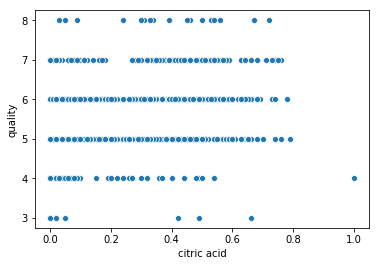

correlation
 [[1.         0.22637251]
 [0.22637251 1.        ]]


In [20]:
print("Data Type\n",data["citric acid"].dtype)
print("Unique Datas\n",data["citric acid"].unique())
print("Describing the data\n",data["citric acid"].describe())

sns.scatterplot(x="citric acid",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["citric acid"],data.quality))

In [21]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Residual Sugar

Data Type
 float64
Unique Datas
 [ 1.9   2.6   2.3   1.8   1.6   1.2   2.    6.1   3.8   3.9   1.7   4.4
  2.4   1.4   2.5  10.7   5.5   2.1   1.5   5.9   2.8   2.2   3.    3.4
  5.1   4.65  1.3   7.3   7.2   2.9   2.7   5.6   3.1   3.2   3.3   3.6
  4.    7.    6.4   3.5  11.    3.65  4.5   4.8   2.95  5.8   6.2   4.2
  7.9   3.7   6.7   6.6   2.15  5.2   2.55 15.5   4.1   8.3   6.55  4.6
  4.3   5.15  6.3   6.    8.6   7.5   2.25  4.25  2.85  3.45  2.35  2.65
  9.    8.8   5.    1.65  2.05  0.9   8.9   8.1   4.7   1.75  7.8  12.9
 13.4   5.4  15.4   3.75 13.8   5.7  13.9 ]
Describing the data
 count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


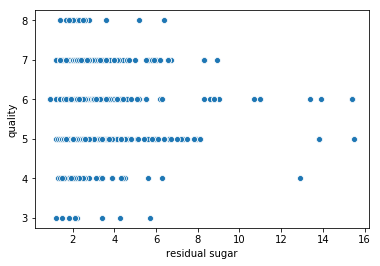

correlation
 [[1.         0.01373164]
 [0.01373164 1.        ]]


In [22]:
print("Data Type\n",data["residual sugar"].dtype)
print("Unique Datas\n",data["residual sugar"].unique())
print("Describing the data\n",data["residual sugar"].describe())

sns.scatterplot(x="residual sugar",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["residual sugar"],data.quality))

In [23]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Chlorides

Data Type
 float64
Unique Datas
 [0.076 0.098 0.092 0.075 0.069 0.065 0.073 0.071 0.097 0.089 0.114 0.176
 0.17  0.368 0.086 0.341 0.077 0.082 0.106 0.084 0.085 0.08  0.105 0.083
 0.103 0.066 0.172 0.074 0.088 0.332 0.05  0.054 0.113 0.068 0.081 0.11
 0.07  0.111 0.079 0.115 0.094 0.093 0.104 0.464 0.401 0.062 0.107 0.045
 0.058 0.102 0.467 0.091 0.122 0.09  0.119 0.178 0.146 0.072 0.118 0.049
 0.06  0.117 0.087 0.236 0.61  0.095 0.1   0.36  0.067 0.27  0.099 0.046
 0.061 0.056 0.039 0.059 0.101 0.057 0.337 0.078 0.263 0.063 0.611 0.064
 0.096 0.358 0.343 0.186 0.112 0.213 0.214 0.121 0.128 0.052 0.12  0.116
 0.109 0.159 0.124 0.174 0.047 0.127 0.413 0.152 0.053 0.055 0.051 0.125
 0.2   0.171 0.226 0.25  0.108 0.148 0.143 0.222 0.157 0.422 0.034 0.387
 0.415 0.243 0.241 0.19  0.132 0.126 0.038 0.044 0.041 0.165 0.048 0.145
 0.147 0.012 0.194 0.161 0.123 0.414 0.216 0.043 0.042 0.369 0.166 0.136
 0.403 0.137 0.168 0.153 0.267 0.169 0.205 0.235 0.23 ]
Describing the data
 count    1599.0

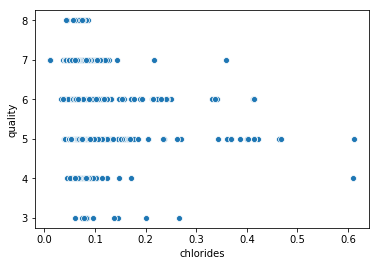

correlation
 [[ 1.         -0.12890656]
 [-0.12890656  1.        ]]


In [24]:
print("Data Type\n",data["chlorides"].dtype)
print("Unique Datas\n",data["chlorides"].unique())
print("Describing the data\n",data["chlorides"].describe())

sns.scatterplot(x="chlorides",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["chlorides"],data.quality))

In [25]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Free Sulfur Dioxide

Data Type
 float64
Unique Datas
 [11.  25.  15.  17.  13.   9.  16.  52.  51.  35.   6.  29.  23.  10.
 21.   4.  14.   8.  22.  40.   5.   3.   7.  12.  30.  33.  50.  19.
 20.  27.  18.  28.  34.  42.  41.  37.  32.  36.  24.  26.  39.  40.5
 68.  31.  38.  43.  47.   1.  54.  46.  45.   2.   5.5 53.  37.5 57.
 48.  72.  55.  66. ]
Describing the data
 count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64


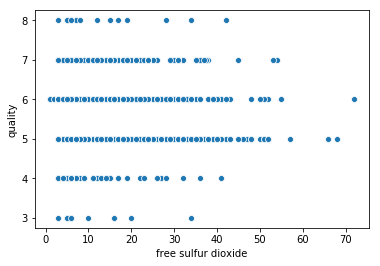

correlation
 [[ 1.         -0.05065606]
 [-0.05065606  1.        ]]


In [26]:
print("Data Type\n",data["free sulfur dioxide"].dtype)
print("Unique Datas\n",data["free sulfur dioxide"].unique())
print("Describing the data\n",data["free sulfur dioxide"].describe())

sns.scatterplot(x="free sulfur dioxide",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["free sulfur dioxide"],data.quality))

In [27]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Total Sulfur Dioxide

Data Type
 float64
Unique Datas
 [ 34.   67.   54.   60.   40.   59.   21.   18.  102.   65.   29.  145.
 148.  103.   56.   71.   37.   23.   11.   35.   16.   82.  113.   83.
  50.   15.   30.   19.   87.   46.   14.  114.   12.   96.  119.   73.
  45.   10.  110.   52.  112.   39.   27.   94.   43.   42.   80.   51.
  61.  136.   31.  125.   24.  140.  133.   85.  106.   22.   36.   69.
  64.  153.   47.  108.  111.   62.   28.   89.   13.   90.  134.   99.
  26.   63.  105.   20.  141.   88.  129.  128.   86.  121.  101.   44.
   8.   49.   38.  143.  144.  127.  126.  120.   55.   93.   95.   41.
  58.   72.   81.  109.   33.   53.   98.   48.   70.   25.  135.   92.
  74.   32.   77.  165.   75.  124.   78.  122.   66.   68.   17.   91.
  76.  151.  142.  116.  149.   57.  104.   84.  147.  155.  152.    9.
 139.  130.    7.  100.  115.    6.   79.  278.  289.  160.   77.5 131. ]
Describing the data
 count    1599.000000
mean       46.467792
std        32.895324
min         6.000

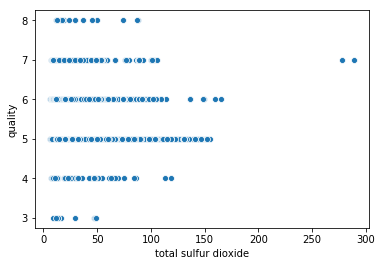

correlation
 [[ 1.         -0.18510029]
 [-0.18510029  1.        ]]


In [28]:
print("Data Type\n",data["total sulfur dioxide"].dtype)
print("Unique Datas\n",data["total sulfur dioxide"].unique())
print("Describing the data\n",data["total sulfur dioxide"].describe())

sns.scatterplot(x="total sulfur dioxide",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["total sulfur dioxide"],data.quality))

In [29]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Density

Data Type
 float64
Unique Datas
 [0.9978  0.9968  0.997   0.998   0.9964  0.9946  0.9959  0.9943  0.9974
 0.9986  0.9969  0.9982  0.9966  0.9955  0.9962  0.9972  0.9958  0.9993
 0.9957  0.9975  0.994   0.9976  0.9934  0.9954  0.9971  0.9956  0.9983
 0.9967  0.9961  0.9984  0.9938  0.9932  0.9965  0.9963  0.996   0.9973
 0.9988  0.9937  0.9952  0.9916  0.9944  0.9996  0.995   0.9981  0.9953
 0.9924  0.9948  0.99695 0.99545 0.99615 0.9994  0.99625 0.99585 0.99685
 0.99655 0.99525 0.99815 0.99745 0.9927  0.99675 0.99925 0.99565 1.00005
 0.9985  0.99965 0.99575 0.9999  1.00025 0.9987  0.99935 0.99735 0.99915
 0.9991  1.00015 0.9997  1.001   0.9979  1.0014  1.0001  0.99855 0.99845
 0.9998  0.99645 0.99865 0.9989  0.99975 0.999   1.0015  1.0002  0.9992
 1.0008  1.      1.0006  1.0004  1.0018  0.9912  1.0022  1.0003  0.9949
 0.9951  1.0032  0.9947  0.9995  0.9977  1.0026  1.00315 1.0021  0.9917
 0.9922  0.9921  0.99788 1.00024 0.99768 0.99782 0.99761 0.99803 0.99785
 0.99656 0.99488 0.99823 0

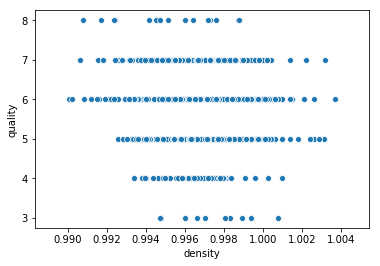

correlation
 [[ 1.         -0.17491923]
 [-0.17491923  1.        ]]


In [30]:
print("Data Type\n",data["density"].dtype)
print("Unique Datas\n",data["density"].unique())
print("Describing the data\n",data["density"].describe())

sns.scatterplot(x="density",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["density"],data.quality))

In [31]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

PH

Data Type
 float64
Unique Datas
 [3.51 3.2  3.26 3.16 3.3  3.39 3.36 3.35 3.28 3.58 3.17 3.11 3.38 3.04
 3.52 3.43 3.34 3.47 3.46 3.45 3.4  3.42 3.23 3.5  3.33 3.21 3.48 3.9
 3.25 3.32 3.15 3.41 3.44 3.31 3.54 3.13 2.93 3.14 3.75 3.85 3.29 3.08
 3.37 3.19 3.07 3.49 3.53 3.24 3.63 3.22 3.68 2.74 3.59 3.   3.12 3.57
 3.61 3.06 3.6  3.69 3.1  3.05 3.67 3.27 3.18 3.02 3.55 2.99 3.01 3.56
 3.03 3.62 2.88 2.95 2.98 3.09 2.86 3.74 2.92 3.72 2.87 2.89 2.94 3.66
 3.71 3.78 3.7  4.01 2.9 ]
Describing the data
 count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64


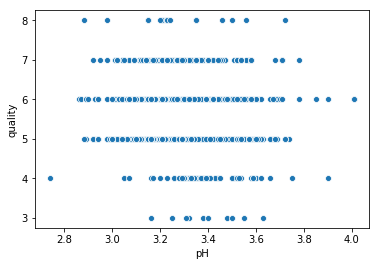

correlation
 [[ 1.         -0.05773139]
 [-0.05773139  1.        ]]


In [32]:
print("Data Type\n",data["pH"].dtype)
print("Unique Datas\n",data["pH"].unique())
print("Describing the data\n",data["pH"].describe())

sns.scatterplot(x="pH",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["pH"],data.quality))

In [33]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Sulphates

Data Type
 float64
Unique Datas
 [0.56 0.68 0.65 0.58 0.46 0.47 0.57 0.8  0.54 0.52 1.56 0.88 0.93 0.75
 1.28 0.5  1.08 0.53 0.91 0.63 0.59 0.55 0.66 0.6  0.73 0.48 0.83 0.51
 0.9  1.2  0.74 0.64 0.77 0.71 0.62 0.39 0.79 0.95 0.82 1.12 1.14 0.78
 1.95 1.22 1.98 0.61 1.31 0.69 0.67 0.7  0.49 0.92 2.   0.72 1.59 0.33
 1.02 0.97 0.85 0.43 1.03 0.86 0.76 1.61 1.09 0.84 0.96 0.45 1.26 0.87
 0.81 1.   1.36 1.18 0.89 0.98 1.13 1.04 1.11 0.99 1.07 0.44 1.06 1.05
 0.42 1.17 1.62 0.94 1.34 1.16 1.1  0.4  1.15 0.37 1.33 1.01]
Describing the data
 count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64


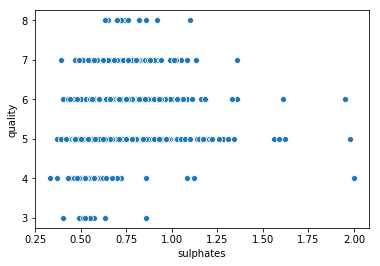

correlation
 [[1.         0.25139708]
 [0.25139708 1.        ]]


In [34]:
print("Data Type\n",data["sulphates"].dtype)
print("Unique Datas\n",data["sulphates"].unique())
print("Describing the data\n",data["sulphates"].describe())

sns.scatterplot(x="sulphates",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["sulphates"],data.quality))

In [35]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Alcohol

Data Type
 float64
Unique Datas
 [ 9.4         9.8        10.          9.5        10.5         9.2
  9.9         9.1         9.3         9.          9.7        10.1
 10.6         9.6        10.8        10.3        13.1        10.2
 10.9        10.7        12.9        10.4        13.         14.
 11.5        11.4        12.4        11.         12.2        12.8
 12.6        12.5        11.7        11.3        12.3        12.
 11.9        11.8         8.7        13.3        11.2        11.6
 11.1        13.4        12.1         8.4        12.7        14.9
 13.2        13.6        13.5        10.03333333  9.55        8.5
 11.06666667  9.56666667 10.55        8.8        13.56666667 11.95
  9.95        9.23333333  9.25        9.05       10.75      ]
Describing the data
 count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


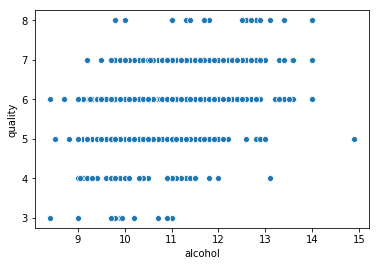

correlation
 [[1.         0.47616632]
 [0.47616632 1.        ]]


In [36]:
print("Data Type\n",data["alcohol"].dtype)
print("Unique Datas\n",data["alcohol"].unique())
print("Describing the data\n",data["alcohol"].describe())

sns.scatterplot(x="alcohol",y="quality",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["alcohol"],data.quality))

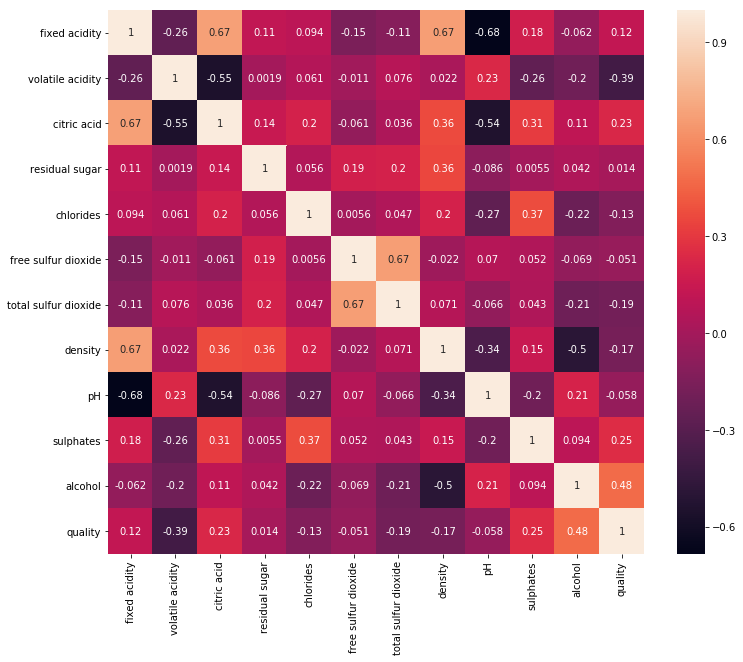

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

In [38]:
X=data.drop("quality",axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [39]:
y=data.quality
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [112]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [92]:
DR=DecisionTreeRegressor()
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.0
Test RMSE = 0.7964766161036996
Train R2_square = 1.0
Test R2_square = 0.12205538511440583


In [104]:
max_depth=list(range(5,50,5))
min_samples_split=list(range(2,20,2))
min_samples_leaf=list(range(2,20,2))

In [105]:
dt_reg={"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}

In [106]:
DR_model = RandomizedSearchCV(estimator = DR,param_distributions = dt_reg,cv=4,random_state = 0)

In [107]:
DR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=18, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [108]:
DR_model.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 5}

In [109]:
DR=DecisionTreeRegressor(min_samples_split=18,max_depth=30,min_samples_leaf=5)
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.44606296019657665
Test RMSE = 0.7209299667302415
Train R2_square = 0.6860502026709294
Test R2_square = 0.2807047109297359


In [44]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.2613790336238528
Test RMSE = 0.6249249954994599
Train R2_square = 0.8922023288205041
Test R2_square = 0.4595234555554054


In [45]:
n_estimators=list(range(50,500,50))
max_depth=list(range(5,100,5))
min_samples_split=list(range(2,20,2))

In [47]:
re_reg={"n_estimators":n_estimators,"max_depth":max_depth,"min_samples_split":min_samples_split}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = re_reg,cv=4,random_state = 0)

In [50]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [51]:
RF_model.best_params_

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 80}

In [54]:
RF=RandomForestRegressor(n_estimators=100,min_samples_split=2,max_depth=80,max_features="log2")
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.21463061710361805
Test RMSE = 0.6161260017236734
Train R2_square = 0.9273139227661882
Test R2_square = 0.47463621251233257


In [55]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
print(selection.feature_importances_)

[0.06138884 0.12236478 0.07962015 0.06132    0.05651101 0.05997572
 0.06803304 0.05264018 0.05608953 0.13014076 0.251916  ]


In [57]:
feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

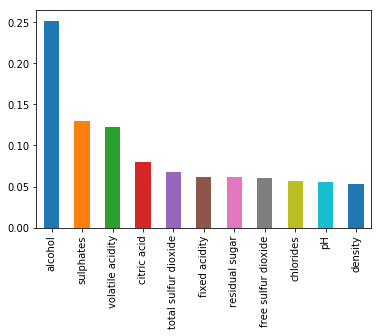

In [58]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [83]:
X_imp = X[feat_importances.nlargest(5).index]

In [84]:
X_imp.head()

,alcohol,sulphates,volatile acidity,citric acid,total sulfur dioxide
0,9.4,0.56,0.70,0.00,34.0
1,9.8,0.68,0.88,0.00,67.0
2,9.8,0.65,0.76,0.04,54.0
3,9.8,0.58,0.28,0.56,60.0
4,9.4,0.56,0.70,0.00,34.0


In [85]:
X_train,X_test,y_train,y_test=train_test_split(X_imp,y,test_size=.20,random_state=14)

In [87]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [88]:
RF_model.best_params_

{'n_estimators': 350, 'min_samples_split': 2, 'max_depth': 90}

In [89]:
RF=RandomForestRegressor(n_estimators=350,min_samples_split=2,max_depth=90)
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.2161611515502945
Test RMSE = 0.62451675195257
Train R2_square = 0.9262735753627729
Test R2_square = 0.4602293770422713


In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
DRC=DecisionTreeClassifier()
DRC.fit(X_train,y_train)
y_train_pre=DRC.predict(X_train)
y_test_pre=DRC.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.0
Test RMSE = 0.8678277478854891
Train R2_square = 1.0
Test R2_square = -0.04228892703166598


In [114]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_train_pre=RFC.predict(X_train)
y_test_pre=RFC.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.15315294598268214
Test RMSE = 0.7180703308172536
Train R2_square = 0.9629900419388318
Test R2_square = 0.28639969726047765


In [116]:
RFc_model = RandomizedSearchCV(estimator = RFC,param_distributions = re_reg,cv=4,random_state = 0)

In [118]:
RFc_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [120]:
RFc_model.best_params_

{'n_estimators': 350, 'min_samples_split': 2, 'max_depth': 90}

In [121]:
RFC=RandomForestClassifier(n_estimators=350,min_samples_split=2,max_depth=90,)
RFC.fit(X_train,y_train)
y_train_pre=RFC.predict(X_train)
y_test_pre=RFC.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.0
Test RMSE = 0.698212002188447
Train R2_square = 1.0
Test R2_square = 0.32532335013717883


NameError: name 'data' is not defined